In [2]:
import argparse
import random
import os

import keras
import matplotlib.pyplot as pl
import numpy as np

In [120]:
def make_network(shape):
    network = keras.models.Sequential()
    network.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=shape))
    network.add(keras.layers.MaxPooling2D((2, 2)))
    network.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    network.add(keras.layers.MaxPooling2D((2, 2)))
    network.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    network.add(keras.layers.MaxPooling2D((2, 2)))
    network.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
    network.add(keras.layers.MaxPooling2D((2, 2)))
    network.add(keras.layers.Flatten())
    network.add(keras.layers.Dense(128, activation='relu'))
    network.add(keras.layers.Dropout(0.5))
    network.add(keras.layers.Dense(6, activation='softmax'))
    return network


def load_files(paths):
    images = []
    labels = []

    allowed_digits = [2, 3, 4, 5, 6, 8]

    for path in paths:
        image = keras.preprocessing.image.load_img(os.path.join('data', path))
        grayscale = image.convert('L')
        array = np.asarray(grayscale)
        normalized = array / 255
        images.append(np.atleast_3d(normalized[:, 0:54]))
        label = np.zeros(6)
        label[allowed_digits.index(int(path[0]))] = 1
        labels.append(label)

    all_images = np.stack(images)
    all_labels = np.array(labels)

    return all_images, all_labels

In [121]:
files = os.listdir('data')
random.shuffle(files)
train_images, train_labels = load_files(files[:100])
validation_images, validation_labels = load_files(files[1000:1500])
test_images, test_labels = load_files(files[1500:2000])

In [122]:
print(train_images.shape)
print(train_labels.shape)
network = make_network(train_images.shape[1:])
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
network.summary()

(100, 80, 54, 1)
(100, 6)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 78, 52, 32)        320       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 39, 26, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 37, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 18, 12, 64)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 16, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 8, 5, 128)         0         
_________________________________________________________________
conv2d_65 (Conv2D)         

In [123]:
history = network.fit(
    train_images, train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(validation_images, validation_labels))

Train on 100 samples, validate on 500 samples
Epoch 1/100
100/100 [==============================] - 2s 18ms/step - loss: 1.7885 - accuracy: 0.2100 - val_loss: 1.8907 - val_accuracy: 0.1500
Epoch 2/100
100/100 [==============================] - 2s 16ms/step - loss: 1.7856 - accuracy: 0.2300 - val_loss: 1.7904 - val_accuracy: 0.1800
Epoch 3/100
100/100 [==============================] - 2s 16ms/step - loss: 1.7984 - accuracy: 0.1900 - val_loss: 1.7974 - val_accuracy: 0.1500
Epoch 4/100
100/100 [==============================] - 2s 17ms/step - loss: 1.7887 - accuracy: 0.1900 - val_loss: 1.8004 - val_accuracy: 0.1500
Epoch 5/100
100/100 [==============================] - 2s 16ms/step - loss: 1.7730 - accuracy: 0.2500 - val_loss: 1.8164 - val_accuracy: 0.1500
Epoch 6/100
100/100 [==============================] - 2s 20ms/step - loss: 1.7771 - accuracy: 0.2300 - val_loss: 1.7959 - val_accuracy: 0.1500
Epoch 7/100
100/100 [==============================] - 3s 26ms/step - loss: 1.7759 - accur

Epoch 58/100
100/100 [==============================] - 2s 17ms/step - loss: 1.2432 - accuracy: 0.5800 - val_loss: 1.7293 - val_accuracy: 0.3160
Epoch 59/100
100/100 [==============================] - 2s 18ms/step - loss: 1.1322 - accuracy: 0.7100 - val_loss: 1.8072 - val_accuracy: 0.2680
Epoch 60/100
100/100 [==============================] - 2s 18ms/step - loss: 1.0914 - accuracy: 0.6600 - val_loss: 1.8182 - val_accuracy: 0.2640
Epoch 61/100
100/100 [==============================] - 2s 18ms/step - loss: 1.2012 - accuracy: 0.5200 - val_loss: 1.7502 - val_accuracy: 0.3100
Epoch 62/100
100/100 [==============================] - 2s 18ms/step - loss: 1.1372 - accuracy: 0.6900 - val_loss: 1.9841 - val_accuracy: 0.2160
Epoch 63/100
100/100 [==============================] - 2s 17ms/step - loss: 1.2145 - accuracy: 0.5300 - val_loss: 1.6897 - val_accuracy: 0.3280
Epoch 64/100
100/100 [==============================] - 2s 18ms/step - loss: 1.1931 - accuracy: 0.6300 - val_loss: 1.7786 - val_ac

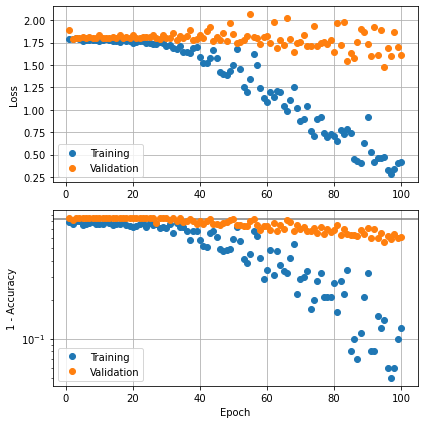

In [125]:
x = np.arange(1, len(history.history['loss']) + 1)
style = dict(marker='o', linestyle='none')

fig = pl.figure(figsize=(6, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(x, history.history['loss'], label='Training', **style)
ax1.plot(x, history.history['val_loss'], label='Validation', **style)
ax1.legend(loc='best')
ax1.set_ylabel('Loss')
ax1.grid(True)

ax2 = fig.add_subplot(2, 1, 2)
ax2.axhline(1 - 1/6, color='0.5')
ax2.semilogy(x, 1 - np.array(history.history['accuracy']), label='Training', **style)
ax2.semilogy(x, 1 - np.array(history.history['val_accuracy']), label='Validation', **style)
ax2.legend(loc='best')
ax2.set_ylabel('1 - Accuracy')
ax2.set_xlabel('Epoch')
ax2.grid(True)

fig.tight_layout()
fig.savefig('history-10.svg')

In [95]:
test_results = network.predict(test_images).argmax(axis=1) == test_labels.argmax(axis=1)

In [89]:
np.mean(test_results)

0.986